<a href="https://colab.research.google.com/github/Chaksome/Machine-Learning-Mnist/blob/main/myNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

CPU times: user 2.22 s, sys: 328 ms, total: 2.54 s
Wall time: 2.45 s


In [3]:
import numpy as np
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()#load the raw data

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
batch_size = 128#设置batchsize
nb_classes = 10
nb_epoch = 16#设置epoch
img_rows, img_cols = 28, 28
nb_filters = 32
pool_size = (2, 2)
kernel_size = (3, 3)

In [7]:
#加载训练好的模型
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive')
model = tf.keras.models.load_model('saved_model/my_model')
model.summary()

Mounted at /content/drive
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 28)       112       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 28)        7084      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 28)       112       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 28)        19628     
                                                                 
 batch_normalization_2 (Batc  

Gauss Noise

In [ ]:
#添加高斯噪声
(X_train, y_train), (X_test, y_test) = mnist.load_data()
mu = 0
sigma = 150
X_train = (X_train+np.random.normal(mu, sigma,size=X_train.shape))
X_train[X_train < 0]=0
X_train[X_train > 255]=255
X_test = (X_test+np.random.normal(mu, sigma,size=X_test.shape))
X_test[X_test < 0]=0
X_test[X_test > 255]=255

468/468 [==============================] - 233s 495ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0173 - val_accuracy: 0.9967 - lr: 4.6070e-05


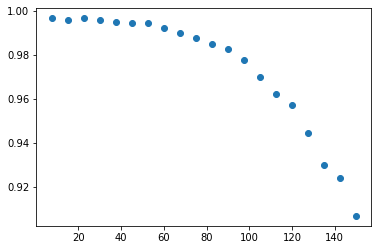

In [19]:
#调节椒盐噪声程度
import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler
a = np.zeros(20)
si=np.zeros(20)
for sigmaa in range(20):
  model = tf.keras.models.load_model('saved_model/my_model')
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  #visulization
  mu = 0
  sigma = 150-sigmaa*7.5
  X_train = (X_train+np.random.normal(mu, sigma,size=X_train.shape))
  X_train[X_train < 0]=0
  X_train[X_train > 255]=255
  X_test = (X_test+np.random.normal(mu, sigma,size=X_test.shape))
  X_test[X_test < 0]=0
  X_test[X_test > 255]=255
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
  input_shape = (img_rows, img_cols,1)
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  X_train /= 255.0
  X_test /= 255.0
  Y_train = np_utils.to_categorical(y_train, nb_classes)
  Y_test = np_utils.to_categorical(y_test, nb_classes)
  annealer = LearningRateScheduler(lambda x: 1*1e-3 * 0.95 ** (x+60), verbose=0)
  from keras.preprocessing.image import ImageDataGenerator
  datagen = ImageDataGenerator(
          rotation_range=5,  
          zoom_range = 0.08, 
          shear_range=0.08, 
      
          width_shift_range=0.0, 
          height_shift_range=0.0)
  history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size), epochs = 1, steps_per_epoch = X_train.shape[0]//batch_size,
                                validation_data = (X_test,Y_test), callbacks=[annealer], verbose=1)
  a[sigmaa] = history.history['val_accuracy'][0]
  si[sigmaa] = 150-7.5*sigmaa
plt.scatter(si,a)

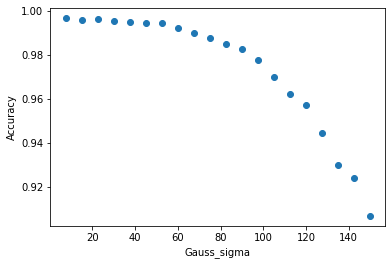

In [20]:
plt.xlabel('Gauss_sigma')
plt.ylabel('Accuracy')
plt.scatter(si,a)

Salt Pepper Noise

In [ ]:
#添加椒盐噪声
(X_train, y_train), (X_test, y_test) = mnist.load_data()
mu = 0
sigma = 50
A = (np.random.normal(mu, sigma,size=X_train.shape))
X_train[A < -50/1.05]=0
X_train[A > 50/1.05]=255
B = (np.random.normal(mu, sigma,size=X_test.shape))
X_test[B < -50/1.05]=0
X_test[B > 50/1.05]=255

In [ ]:
#调节椒盐噪声程度
import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler
a = np.zeros(20)
si=np.zeros(20)
for sigmaa in range(20):
  model = tf.keras.models.load_model('saved_model/my_model')
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  #visulization
  mu = 0
  sigma = 50
  salt = 1.05-sigmaa*0.05
  A = (np.random.normal(mu, sigma,size=X_train.shape))
  X_train[A < -1/salt*sigma]=0
  X_train[A > 1/salt*sigma]=255
  B = (np.random.normal(mu, sigma,size=X_test.shape))
  X_test[B < -1/salt*sigma]=0
  X_test[B > 1/salt*sigma]=255
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
  input_shape = (img_rows, img_cols,1)
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  X_train /= 255.0
  X_test /= 255.0
  Y_train = np_utils.to_categorical(y_train, nb_classes)
  Y_test = np_utils.to_categorical(y_test, nb_classes)
  annealer = LearningRateScheduler(lambda x: 1*1e-3 * 0.95 ** (x+60), verbose=0)
  from keras.preprocessing.image import ImageDataGenerator
  datagen = ImageDataGenerator(
          rotation_range=5,  
          zoom_range = 0.08, 
          shear_range=0.08, 
      
          width_shift_range=0.0, 
          height_shift_range=0.0)
  history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size), epochs = 1, steps_per_epoch = X_train.shape[0]//batch_size,
                                validation_data = (X_test,Y_test), callbacks=[annealer], verbose=1)
  a[sigmaa] = history.history['val_accuracy'][0]
  si[sigmaa] = 1.05-0.05*sigmaa
plt.xlabel('salt and pepper beta')
plt.ylabel('Accuracy')
plt.scatter(si,a)

Blocking

In [ ]:
#添加局部遮挡
from PIL import Image, ImageDraw
(X_train, y_train), (X_test, y_test) = mnist.load_data()

pixel = 10#设置局部遮挡的黑块尺寸
halfpixel = pixel//2
for k in range(len(X_train)):
  oo = random.randint(halfpixel,27-halfpixel)
  kk = random.randint(halfpixel,27-halfpixel)#局部遮挡的位置随机
  for i in range(pixel):
    for j in range(pixel):
      X_train[k][oo-halfpixel+i][kk-halfpixel+j] = 0

for k in range(len(X_test)):
  oo = random.randint(halfpixel,27-halfpixel)
  kk = random.randint(halfpixel,27-halfpixel)
  for i in range(pixel):
    for j in range(pixel):
      X_test[k][oo-halfpixel+i][kk-halfpixel+j] = 0

In [ ]:
#调节黑块尺寸研究模型晃动
import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler
a = np.zeros(20)
si=np.zeros(20)
for sigmaa in range(20):
  model = tf.keras.models.load_model('saved_model/my_model')
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  salt = 1.05-sigmaa*0.05
  A = (np.random.normal(mu, sigma,size=X_train.shape))
  X_train[A < -1/salt*sigma]=0
  X_train[A > 1/salt*sigma]=255
  B = (np.random.normal(mu, sigma,size=X_test.shape))
  X_test[B < -1/salt*sigma]=0
  X_test[B > 1/salt*sigma]=255
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
  input_shape = (img_rows, img_cols,1)
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  X_train /= 255.0
  X_test /= 255.0
  Y_train = np_utils.to_categorical(y_train, nb_classes)
  Y_test = np_utils.to_categorical(y_test, nb_classes)
  annealer = LearningRateScheduler(lambda x: 1*1e-3 * 0.95 ** (x+60), verbose=0)
  from keras.preprocessing.image import ImageDataGenerator
  datagen = ImageDataGenerator(
          rotation_range=5,  
          zoom_range = 0.08, 
          shear_range=0.08, 
      
          width_shift_range=0.0, 
          height_shift_range=0.0)
  history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size), epochs = 1, steps_per_epoch = X_train.shape[0]//batch_size,
                                validation_data = (X_test,Y_test), callbacks=[annealer], verbose=1)
  a[sigmaa] = history.history['val_accuracy'][0]
  si[sigmaa] = 1.05-0.05*sigmaa
plt.xlabel('salt and pepper beta')
plt.ylabel('Accuracy')
plt.scatter(si,a)